In [369]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [370]:
rowdata = pd.read_csv("D:\AI\diabetes.csv") #讀入csv檔，並把資料命名為'rowdata'
rowdata.head(10) #show出前10筆資料

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [371]:
rowdata['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Text(0.5, 1.0, 'Outcome')

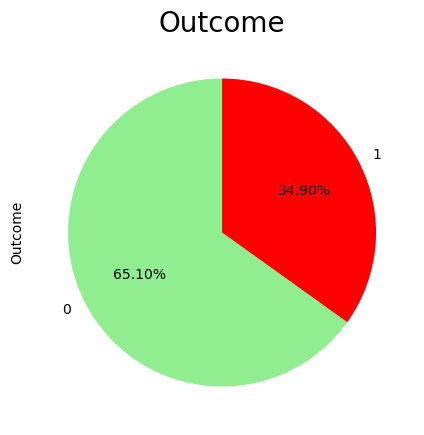

In [372]:
colors = ["lightgreen", "red"]
rowdata["Outcome"].value_counts().plot(
    kind="pie",  #圖形類別:圓餅圖
    shadow=False,  #不要有陰影
    startangle=90,  #圓餅圖角度
    figsize=(5, 5),  #圖形大小
    autopct="%1.2f%%",
    colors=colors,
)
plt.title("Outcome", fontsize=20, color="black")

In [373]:
#紀錄資料型態不是object的數量
num_cols = [col for col in rowdata.columns if rowdata[col].dtype != 'object']
num_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

C:\Users\88690\AppData\Local\Temp\ipykernel_17056\766329844.py:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\88690\AppData\Local\Temp\ipykernel_17056\766329844.py:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\88690\AppData\Local\Temp\ipykernel_17056\766329844.py:8: UserWarning:



`distplot` is a 

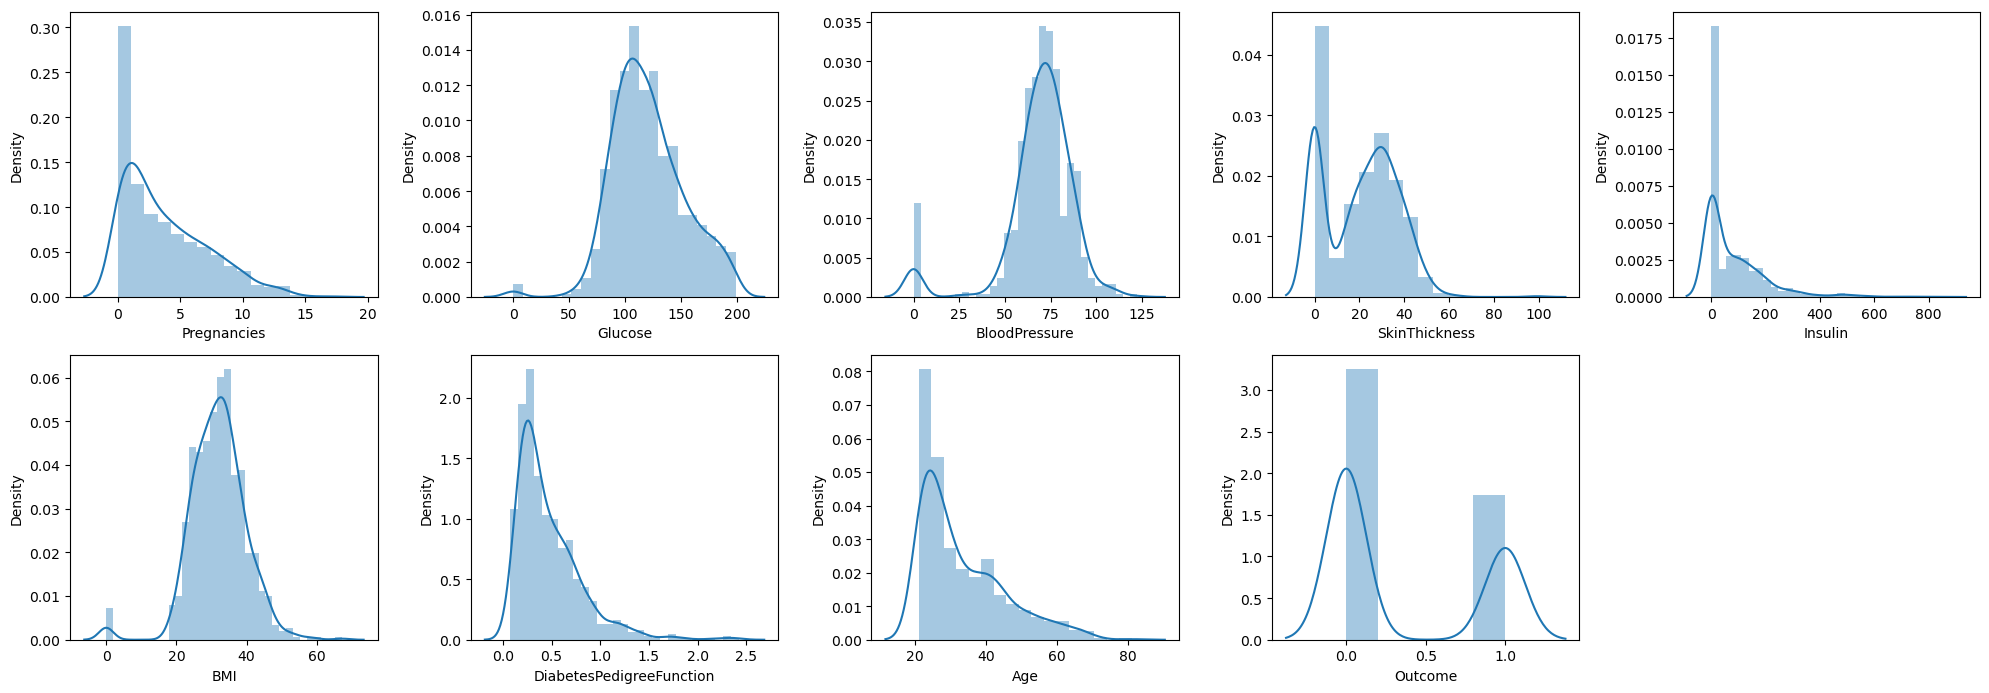

In [320]:
#檢查數值特徵分佈
plt.figure(figsize = (20,10))
plot_number = 1

for column in num_cols:
    if plot_number <= 14:
        ax = plt.subplot(3, 5, plot_number)
        sns.distplot(rowdata[column])
        plt.xlabel(column) 
        
    plot_number += 1
    
plt.tight_layout()
plt.show()

**<font color = blue>Pregancies(懷孕次數):呈現正偏態。。</font>**

**<font color = blue>Glucose(葡萄糖濃度):稍微呈現負偏態，有幾筆資料為0，因不符合正常情況等等需做刪除。</font>**

**<font color = blue>BloodPressure(血壓):呈現常態分布，有幾筆資料為0，因不符合正常情況等等需做刪除。</font>**

**<font color = blue>SkinThickness(三頭肌皮褶厚度):</font>**

**<font color = blue>Insulin(血清胰島素):</font>**

**<font color = blue>BMI:呈現常態分布，有幾筆資料為0，因不符合正常情況等等需做刪除。</font>**

**<font color = blue>DiabetesPedigressFunction(糖尿病譜系函數):</font>**

**<font color = blue>Age(年齡):呈現正偏態。</font>**


















In [374]:
#檢查有沒有遺失值
rowdata.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**<font color = blue>原始資料沒有遺失值。</font>**


**<font color=black size=5 face=雅黑>資料探索</font>**

繪製提琴圖(violin)，觀察'年齡'與'是否有腎臟病'高低關係

繪製分布估計圖(kde)，觀察'隨機血糖'與'是否有腎臟病'高低關係

繪製散佈圖(scatter)，觀察'年齡'與'隨機血糖'高低關係

In [375]:
# 定義畫圖的function

def violin(col):
    fig = px.violin(rowdata, y=col, x="Outcome", color="Outcome", box=True, template = 'plotly_dark')
    return fig.show()

def kde(col):
    grid = sns.FacetGrid(rowdata, hue="Outcome", height = 6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()
    
def scatter(col1, col2):
    fig = px.scatter(rowdata, x=col1, y=col2, color="Outcome", template = 'plotly_dark')
    return fig.show()

In [376]:
violin('Pregnancies')
violin('Glucose')
violin('BloodPressure')
violin('SkinThickness')
violin('Insulin')
violin('BMI')
violin('DiabetesPedigreeFunction')
violin('Age')


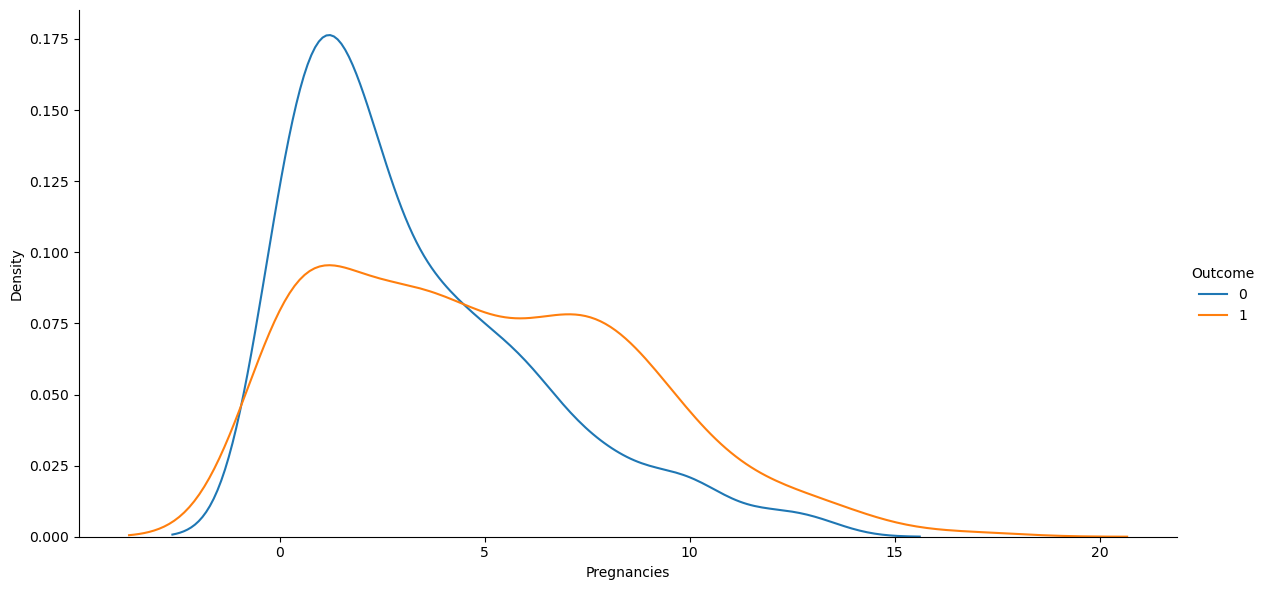

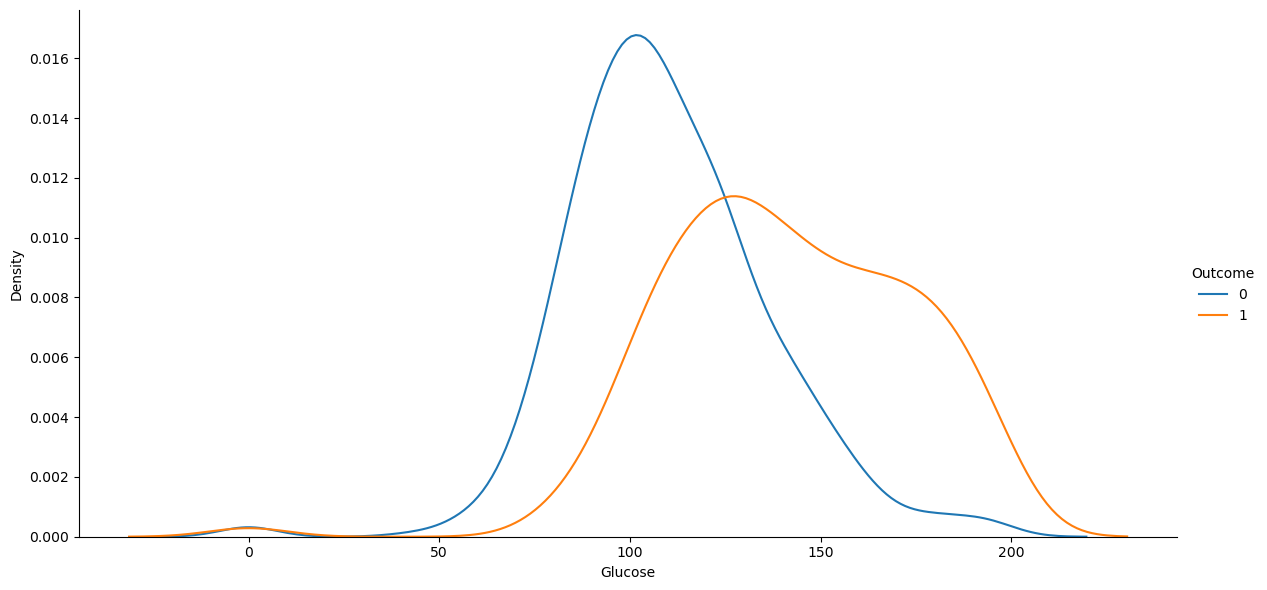

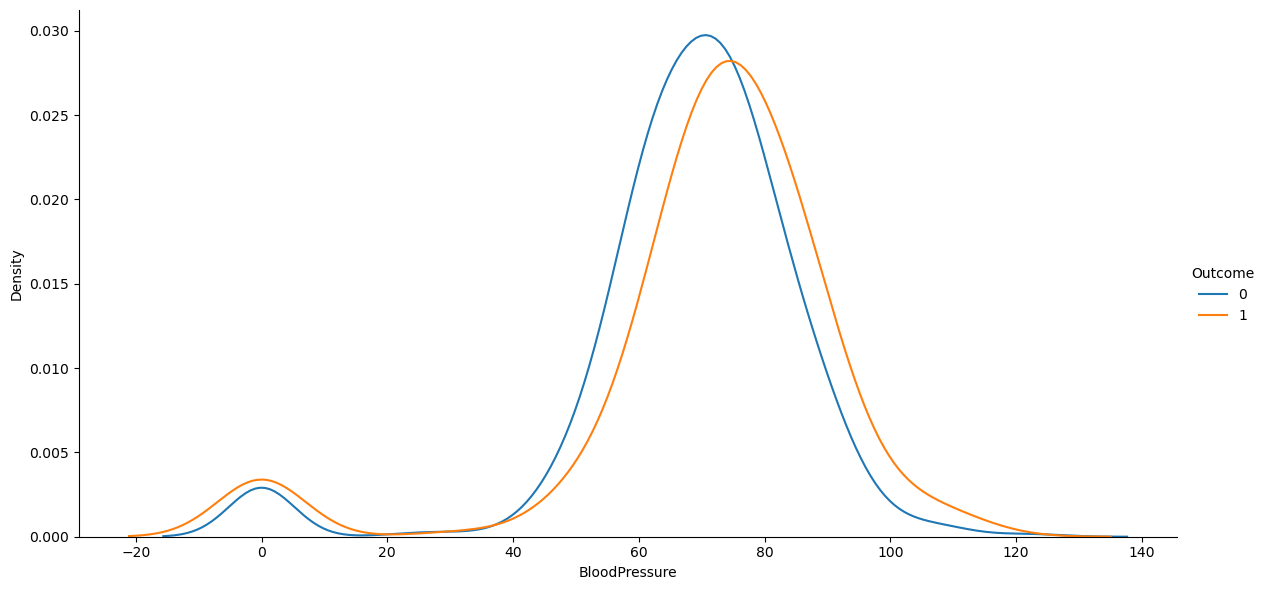

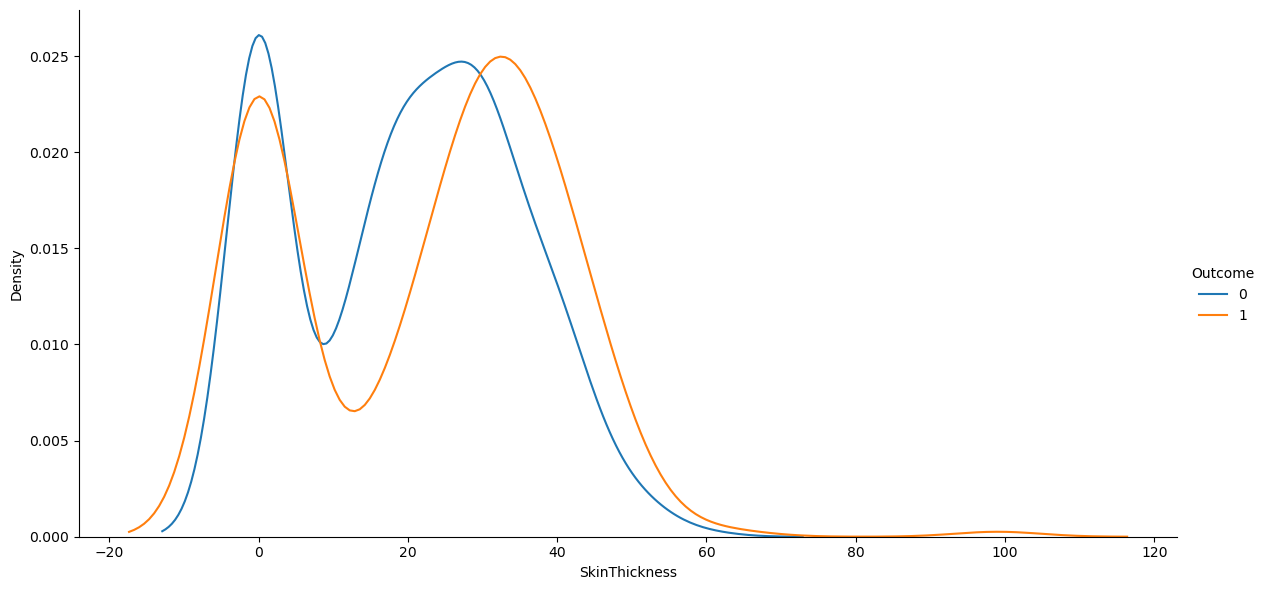

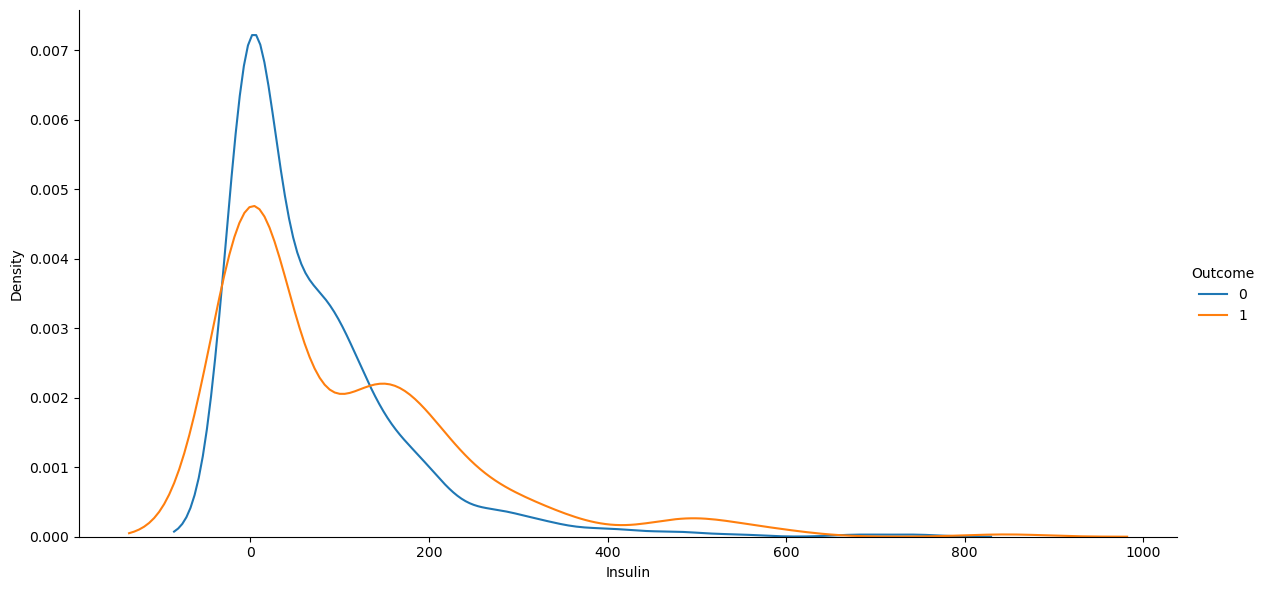

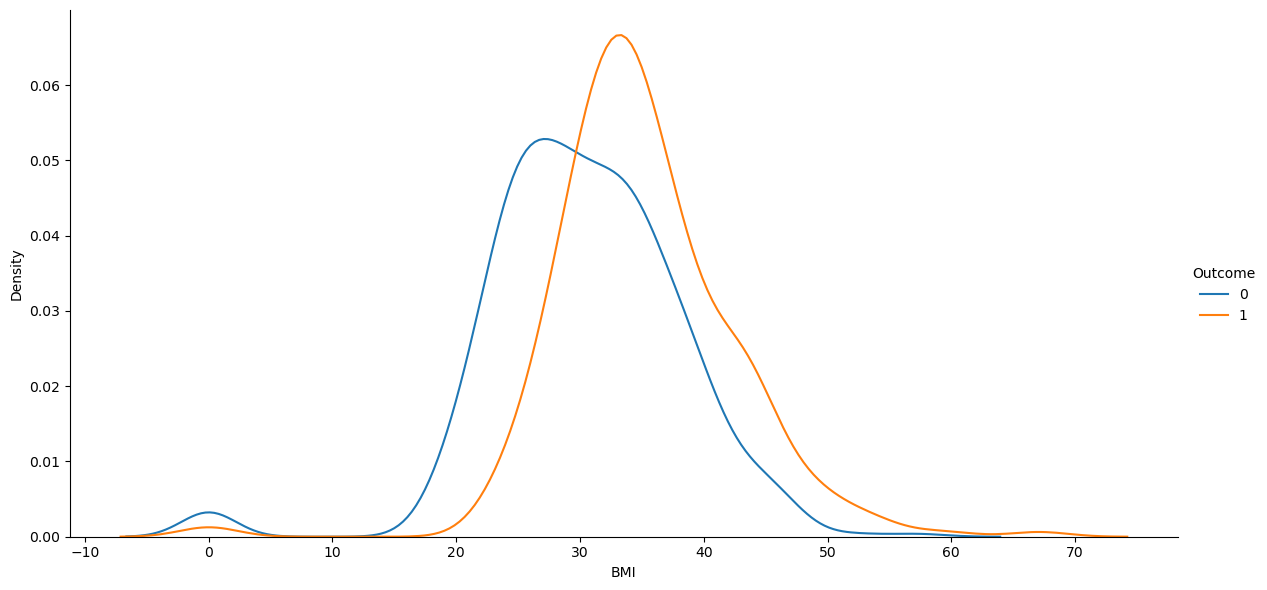

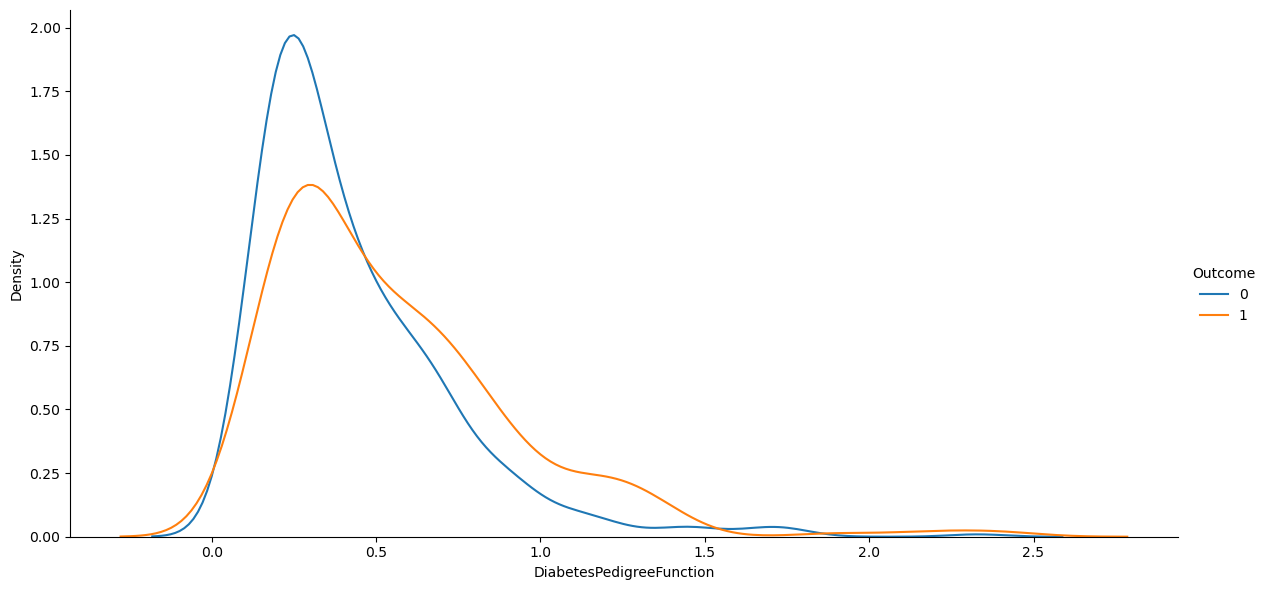

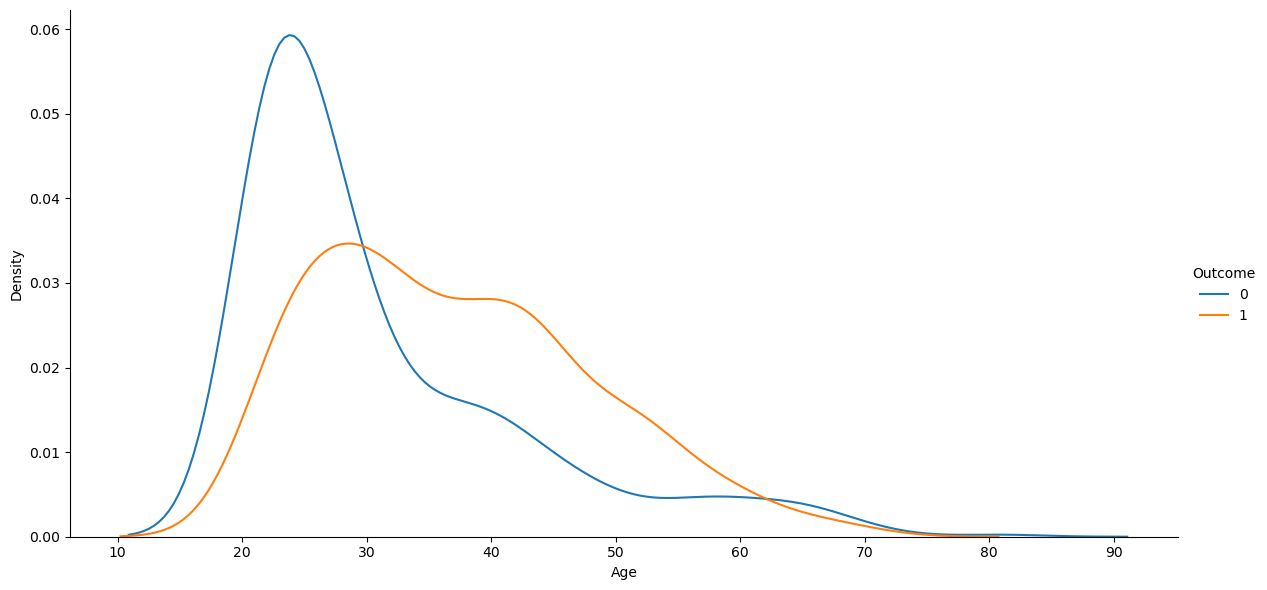

In [377]:
kde('Pregnancies')
kde('Glucose')
kde('BloodPressure')
kde('SkinThickness')
kde('Insulin')
kde('BMI')
kde('DiabetesPedigreeFunction')
kde('Age')


In [378]:
#計算皮爾森相關係數
rowdata.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [379]:
#Glucose為0的樣本數
print('葡萄糖濃度為0的樣本數為',len(rowdata[(rowdata.Glucose == 0)]))
      #SkinThickness為0的樣本數
print('三頭肌皮褶厚度為0的樣本數為',len(rowdata[(rowdata.SkinThickness == 0)]))
#BloodPressure為0的樣本數
print('血壓為0的樣本數為',len(rowdata[(rowdata.BloodPressure == 0)]))
#BMI為0的樣本數
print('BMI為0的樣本數為',len(rowdata[(rowdata.BMI == 0)]))

葡萄糖濃度為0的樣本數為 5
三頭肌皮褶厚度為0的樣本數為 227
血壓為0的樣本數為 35
BMI為0的樣本數為 11


In [380]:
print('不合理的樣本數為',len(rowdata[(rowdata.Glucose == 0)|(rowdata.SkinThickness == 0)|(rowdata.BloodPressure == 0)|(rowdata.BMI == 0)]))

不合理的樣本數為 236


In [385]:
#刪除Glucose、BloodPressure、BMI為0的樣本
rowdata=rowdata.drop(rowdata[(rowdata.Glucose == 0)].index)
rowdata=rowdata.drop(rowdata[(rowdata.SkinThickness == 0)].index)
rowdata=rowdata.drop(rowdata[(rowdata.BloodPressure == 0)].index)
rowdata=rowdata.drop(rowdata[(rowdata.BMI == 0) ].index)

In [386]:
#刪除Glucose、BloodPressure、BMI為0之後的樣本大小
print('刪除Glucose、BloodPressure、BMI為0之後的樣本大小為',np.shape(rowdata))

刪除Glucose、BloodPressure、BMI為0之後的樣本大小為 (532, 9)


In [387]:
#計算皮爾森相關係數
rowdata.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.125330,0.204663,0.095085,-0.006568,0.008576,0.007435,0.640747,0.252586
Glucose,0.125330,1.000000,0.219178,0.226590,0.459905,0.247079,0.165817,0.278907,0.503614
BloodPressure,0.204663,0.219178,1.000000,0.226072,0.007052,0.307357,0.008047,0.346939,0.183432
SkinThickness,0.095085,0.226590,0.226072,1.000000,0.126240,0.647422,0.118636,0.161336,0.254874
Insulin,-0.006568,0.459905,0.007052,0.126240,1.000000,0.191168,0.151531,0.081126,0.212204
BMI,0.008576,0.247079,0.307357,0.647422,0.191168,1.000000,0.151107,0.073438,0.300901
DiabetesPedigreeFunction,0.007435,0.165817,0.008047,0.118636,0.151531,0.151107,1.000000,0.071654,0.233074
Age,0.640747,0.278907,0.346939,0.161336,0.081126,0.073438,0.071654,1.000000,0.315097
Outcome,0.252586,0.503614,0.183432,0.254874,0.212204,0.300901,0.233074,0.315097,1.000000


In [388]:
rowdata.dtypes #查看資料及內的特徵資料型態

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

<font color=black size=5 face=雅黑>●區分</font> **<font color=black size=5 face=雅黑>特徵欄位</font>** <font color=black size=5 face=雅黑>與</font> **<font color=black size=5 face=雅黑>預測目標欄位</font>**


In [389]:
#將移除Outcome(預測目標)的剩餘欄位命名為 clear_data
clear_data=rowdata.drop(['Outcome'],axis=1)
clear_data.head(5) #show出前5筆資料

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
6,3,78,50,32,88,31.0,0.248,26


In [390]:
#將Outcome(預測目標)欄位命名為label
label=rowdata['Outcome']

**<font color=black size=5 face=雅黑>模型開發</font>**


In [391]:
x_features=clear_data

In [360]:
x_features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
6,3,78,50,32,88,31.0,0.248,26
...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30


In [408]:
y_label=rowdata['Outcome']

In [409]:
y_label

0      1
1      0
3      0
4      1
6      1
      ..
761    1
763    0
764    0
765    0
767    0
Name: Outcome, Length: 532, dtype: int64

**<font color=black size=5 face=雅黑>1.切分資料集</font>**


In [410]:
from sklearn.model_selection import KFold #使用k-fold來做

In [411]:
# 定義K折交叉驗證
kf = KFold(n_splits=10,shuffle=True,random_state=42) #sample random分成10分

**<font color=black size=5 face=雅黑>2.選擇模型</font>**


In [412]:
from sklearn.linear_model import LogisticRegression
#因Outcome為二元結果，故使用羅吉斯回歸

In [413]:
model=LogisticRegression()

**<font color=black size=5 face=雅黑>3.K-fold交叉驗證</font>**



In [414]:
#執行K-fold交叉驗證
test_bias= []
test_variance= []
train_errors= []
test_errors= []

for train_index, test_index in kf.split(x_features):
    
    #拆分數據集為訓練集和測試集
    X_train = x_features.iloc[train_index]
    y_train = y_label[train_index]
    X_test = x_features.iloc[test_index]
    y_test =  y_label[test_index]
   
    #訓練模型
    model.fit(X_train,y_train)
    
    y_train_pred=model.predict(X_train) #預測訓練集資料
    y_test_pred=model.predict(X_test) #預測測試集資料
    
    #計算偏差Bias和變異數Variance
    bias=np.mean((y_test_pred - np.mean(y_test)) ** 2)
    variance=np.var(y_test_pred)
    
    test.bias.append(bias)
    test_variance.append(variance)
    
    #計算訓練和測試的誤差
    
    train_error=np.sum((y_train_pred - y_train)**2) / len(y_train_pred)
    test_error=np.sum((y_test_pred - y_test)**2) / len(y_test_pred)
    
    train_errors.append(train_error)
    test_errors.append(test_error)

    

KeyError: '[5, 7, 11, 12, 15, 17, 21, 22, 26, 29, 33, 36, 41, 44, 46, 49, 58, 60, 61, 62, 64, 67, 75, 81, 93, 100, 101, 102, 106, 113, 115, 116, 117, 123, 124, 129, 131, 138, 140, 143, 145, 151, 154, 164, 168, 170, 172, 176, 178, 179, 180, 182, 183, 190, 193, 196, 201, 207, 219, 221, 226, 230, 233, 235, 239, 242, 246, 250, 251, 261, 264, 266, 268, 269, 272, 278, 280, 283, 284, 294, 299, 300, 303, 304, 317, 319, 327, 332, 333, 336, 337, 339, 342, 343, 344, 350, 351, 355, 357, 361, 363, 366, 371, 378, 391, 394, 398, 400, 401, 404, 406, 407, 408, 418, 426, 430, 435, 439, 443, 451, 453, 456, 461, 464, 468, 474, 484, 489, 494, 495, 496, 502, 505, 509, 512, 517, 518, 522, 523, 524, 529, 531] not in index'

**<font color=black size=5 face=雅黑>4.計算Bias and Variance</font>**


In [368]:
#輸出bias and variance
print("Bias:",test_bias)
print("Variance:",test_variance)

#輸出平均訓練和測試誤差
print("平均訓練誤差:",sum(train_errors)/len(train_errors))
print("平均測試誤差:",sum(test_errors)/len(test_errors))

Bias: []
Variance: []


ZeroDivisionError: division by zero